In [49]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/farhantk/Indonesia-Covid-19-Viz/main/covid_19_indonesia_time_series_all.csv")
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [51]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df['2021-06-01':]
df

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-01,ID-AC,Aceh,122,1,117,4,15139,596,11911,2632,...,4.225615,23.25,2885.13,0.19,113.58,11.36,3.94%,78.68%,1.05,0.07
2021-06-01,ID-BA,Bali,28,0,32,-4,47287,1504,45179,604,...,-8.369472,6.64,11215.63,0.00,356.72,35.67,3.18%,95.54%,0.64,0.00
2021-06-01,ID-BT,Banten,119,1,30,88,49595,1258,46891,1446,...,-6.456736,11.10,4625.37,0.09,117.32,11.73,2.54%,94.55%,0.78,0.50
2021-06-01,ID-BE,Bengkulu,40,0,48,-8,8114,180,7188,746,...,-3.533584,20.00,4057.94,0.00,90.02,9.00,2.22%,88.59%,2.22,0.00
2021-06-01,ID-JK,DKI Jakarta,519,11,509,-1,430573,7189,412619,10765,...,-6.204699,47.85,39698.25,1.01,662.82,66.28,1.67%,95.83%,0.71,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,...,1.259638,14.01,19974.38,0.00,459.14,45.91,2.30%,96.64%,2.85,1.00
2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,...,-0.850253,2.36,18959.11,0.00,429.59,42.96,2.27%,97.54%,6.50,1.00
2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,...,-3.216212,1.95,10002.74,0.00,410.83,41.08,4.11%,95.51%,3.20,1.00


In [52]:
df = df[['Location', 'New Cases']]
df

,Location,New Cases
Date,,
2021-06-01,Aceh,122
2021-06-01,Bali,28
2021-06-01,Banten,119
2021-06-01,Bengkulu,40
2021-06-01,DKI Jakarta,519
...,...,...
2022-09-15,Sulawesi Utara,37
2022-09-15,Sumatera Barat,13
2022-09-15,Sumatera Selatan,16


In [53]:
df1 = df.groupby('Location')['New Cases'].sum().reset_index()
df1 = df1[df1['Location'] != 'Indonesia']
df1['Location'] = df1['Location'].str.replace(' ', '')
df1

,Location,New Cases
0,Aceh,29021
1,Bali,119572
2,Banten,284399
3,Bengkulu,21099
4,DKIJakarta,982457
5,DaerahIstimewaYogyakarta,179561
6,Gorontalo,8446
8,Jambi,29031
9,JawaBarat,858326
10,JawaTengah,435426


In [54]:
df1['Location'] = df1['Location'].replace('DaerahIstimewaYogyakarta', 'Yogyakarta')
df1['Location'] = df1['Location'].replace('DKIJakarta', 'JakartaRaya')
df1['Location'] = df1['Location'].replace('KepulauanBangkaBelitung', 'BangkaBelitung')

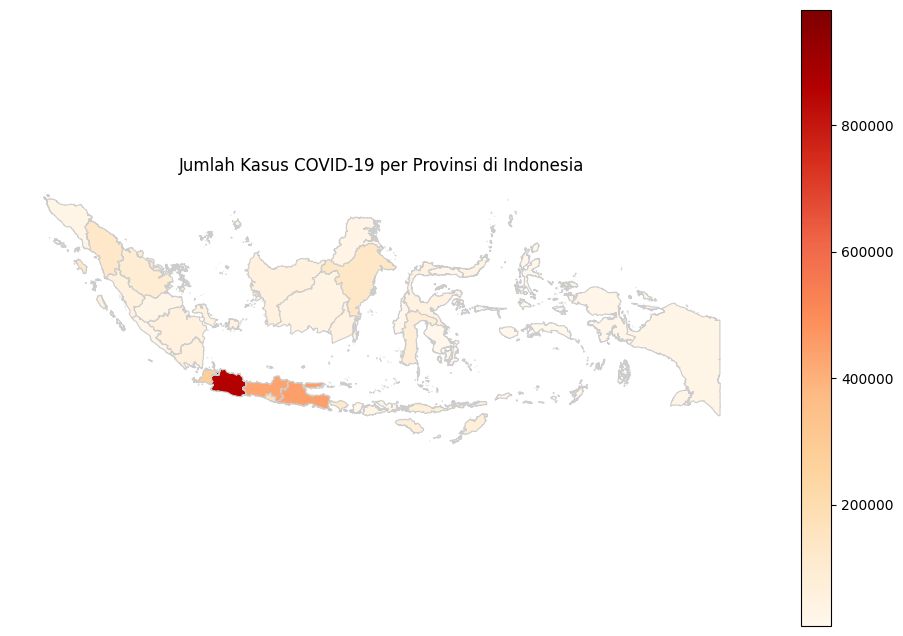

In [55]:
gdf = gpd.read_file('https://raw.githubusercontent.com/farhantk/Indonesia-Covid-19-Viz/main/gadm41_IDN_1.json')
gdf_merged = gdf.merge(df1, how='left', left_on='NAME_1', right_on='Location')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_merged.plot(column='New Cases', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Jumlah Kasus COVID-19 per Provinsi di Indonesia')
plt.axis('off')
plt.show()